In [1]:
import pandas as pd

In [2]:
#load the data set with the help of read_csv.
df = pd.read_csv("titanic_prepared_data.csv")

In [3]:
# show the first five line in the dataFrame
df.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,0,1,22.0,7.2500,0,0,1,0,0,1,2
1,1,0,38.0,71.2833,1,0,0,1,0,0,2
2,1,0,26.0,7.9250,0,0,1,0,0,1,1
3,1,0,35.0,53.1000,1,0,0,0,0,1,2
4,0,1,35.0,8.0500,0,0,1,0,0,1,1


In [4]:
# separate out the features and labels
x=df.iloc[:,1:].values
print x.shape
y=df.iloc[:,0:1].values
print y.shape

(891, 10)
(891, 1)


In [5]:
# Split the data into train and test set.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)
print x_train.shape
print y_train.shape

(623, 10)
(623, 1)


In [6]:
#classification and calculate the accuracy score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(x_train, y_train.ravel()) #Trivia : What does ravel do?
y_pred_log_reg = clf.predict(x_test)
acc_log_reg = round( accuracy_score(y_pred_log_reg, y_test) * 100, 2)
print (str(acc_log_reg) + ' %')

80.22 %


In [7]:
print y_train.shape
print y_train.ravel().shape

(623, 1)
(623,)


In [8]:
# Regularisation Constant
clf2 = LogisticRegression(C=0.08)
clf2.fit(x_train, y_train.ravel()) #Trivia : What does ravel do?
y_pred_log_reg2 = clf2.predict(x_test)
acc_log_reg2 = round( accuracy_score(y_pred_log_reg2, y_test) * 100, 2)
print (str(acc_log_reg2) + ' %')

81.34 %


In [9]:
#classification and calculate theaccuracy score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(x_train, y_train.ravel())
y_pred_knn = clf.predict(x_test)
acc_knn = round(accuracy_score(y_pred_knn, y_test) * 100, 2)
print (str(acc_knn) + ' percent')

68.28 percent


In [10]:
#classification and calculate theaccuracy score

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf = GaussianNB()
clf.fit(x_train, y_train.ravel())
y_pred_gnb = clf.predict(x_test)
acc_gnb = round(accuracy_score(y_pred_gnb, y_test) * 100, 2)
print (str(acc_gnb) + ' percent')

78.36 percent


In [11]:
#classification and calculate theaccuracy score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train.ravel())
y_pred_decision_tree = clf.predict(x_test)
acc_decision_tree = round(accuracy_score(y_pred_decision_tree, y_test) * 100, 2)
print (str(acc_decision_tree) + ' percent')

76.49 percent


In [12]:
#classification and calculate the accuracy score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train.ravel())
y_pred_random_forest = clf.predict(x_test)
acc_random_forest = round(accuracy_score(y_pred_random_forest, y_test) * 100, 2)
print (str(acc_random_forest) + ' percent')

82.09 percent


In [17]:

if (acc_random_forest >= acc_decision_tree):
    print "Random forest classifier is higher accuracy %s percent of decision tree classifier"%(acc_random_forest)
else:
    print "Decision tree classifier is higher accuracy %s percent of Random forest classifier" % (acc_decision_tree)
    

Random forest classifier is higher accuracy 82.09 percent of decision tree classifier


In [14]:
#accuracy score of the classifiers.
models = pd.DataFrame({
    'All_Model': ['Logistic Regression', 'KNN', 'Decision Tree', 
              'Random Forest', 'Naive Bayes'],
    
    'All_Score': [acc_log_reg, acc_knn,  acc_decision_tree, 
              acc_random_forest, acc_gnb]
    })

models.sort_values(by='All_Score', ascending=False)

,All_Model,All_Score
3,Random Forest,82.09
0,Logistic Regression,80.22
4,Naive Bayes,78.36
2,Decision Tree,76.49
1,KNN,68.28


<function seaborn.rcmod.set>

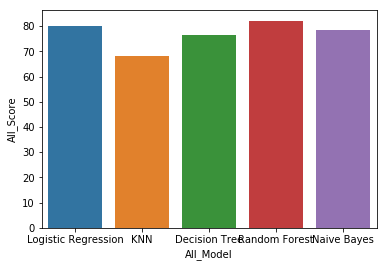

In [18]:
# plot bar graph with algorithms name as levels vs accuracy score.
import seaborn as sns
sns.barplot(x="All_Model", y="All_Score", data=models)
sns.set